# warning parameter STD:AIDS and STD:CERVICAL seems to be empty. removed from the trainni. might look for it further

# Cervical Cancer Analysis

# Introduction

the main goal of this project is analysing cervical cancer with k means clustering technique and training a MLP to predict atributes of interest.

# Biblioteca

In [79]:
!pip install scikit-learn-extra

import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

# Data

first we look at the raw data set info.

In [80]:
df = pd.read_csv('https://raw.githubusercontent.com/gabriel-ferreira-da-silva/Cancer-Analysis-With-MLP-and-Cluster-/main/data/risk_factors_cervical_cancer.csv')

In [81]:
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [82]:
for i in df['STDs:AIDS']:

  if i=="1.0":
    print("aaaaaaddddddddddddddddddddddddddddddddddddaaaaa")

In [83]:
len(df.query("Biopsy==1"))

55

converteramos os valores que não sejam numero para float ou -1 caso nã

In [84]:
for column in df:
  new_column = []
  for value in df[column]:
    try:
        new_column.append(float(value))
    except:
      new_column.append(-1)
  df.drop(columns=[column])
  df[column]= new_column

In [85]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.420746,16.848485,2.061772,0.128205,1.186089,0.431127,0.434732,1.846520,-0.039627,...,-0.409091,-0.435897,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.750183,3.227707,1.616617,0.377144,4.066945,2.216784,0.705740,3.681316,0.481456,...,2.591029,2.497367,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


removeremos as colunas com certa taxa de valores nulos

In [86]:
size = len(df[column])
print(size)
droped = []
for column in df:
  count = 0
  for value in df[column]:
    if value==-1:
      count+=1

  if count/size >=0.15:
    droped.append((column, count/size))
    df = df.drop(columns=[column])

df = df.drop(columns=[ 'STDs:cervical condylomatosis','STDs:AIDS'])

df.info()
df.describe()
print("droped columns:")
print(len(droped))
print(droped)

858
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    float64
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 n

In [87]:
df.describe()



,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.420746,16.848485,2.061772,0.128205,1.186089,0.431127,0.434732,1.846520,-0.039627,...,-0.120047,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.750183,3.227707,1.616617,0.377144,4.066945,2.216784,0.705740,3.681316,0.481456,...,0.332304,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


dropando linhas que tenham valores nulos

In [88]:
for column in df:
  df= df[(df[column] >= 0)]

df.describe()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,...,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,27.264970,2.523952,17.142216,2.323353,0.143713,1.235524,0.458953,0.643713,2.290037,0.112275,...,0.002994,0.092814,0.025449,0.004491,0.023952,0.023952,0.044910,0.094311,0.058383,0.067365
std,8.727432,1.640299,2.852046,1.465319,0.351061,4.193611,2.336308,0.479260,3.724400,0.315942,...,0.054677,0.310355,0.157603,0.066915,0.153015,0.153015,0.207262,0.292480,0.234642,0.250841
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
len(df.query("Biopsy==1"))

45

# analise

In [90]:


'''
for i in range(0, 32):
  plt.figure(figsize=(8, 6))  # Set the figure size (optional)
  sns.boxplot( data=df[df.columns[i]])
  plt.title(df.columns[i])
  plt.show()
'''

'\nfor i in range(0, 32):\n  plt.figure(figsize=(8, 6))  # Set the figure size (optional)\n  sns.boxplot( data=df[df.columns[i]])\n  plt.title(df.columns[i])\n  plt.show()\n'

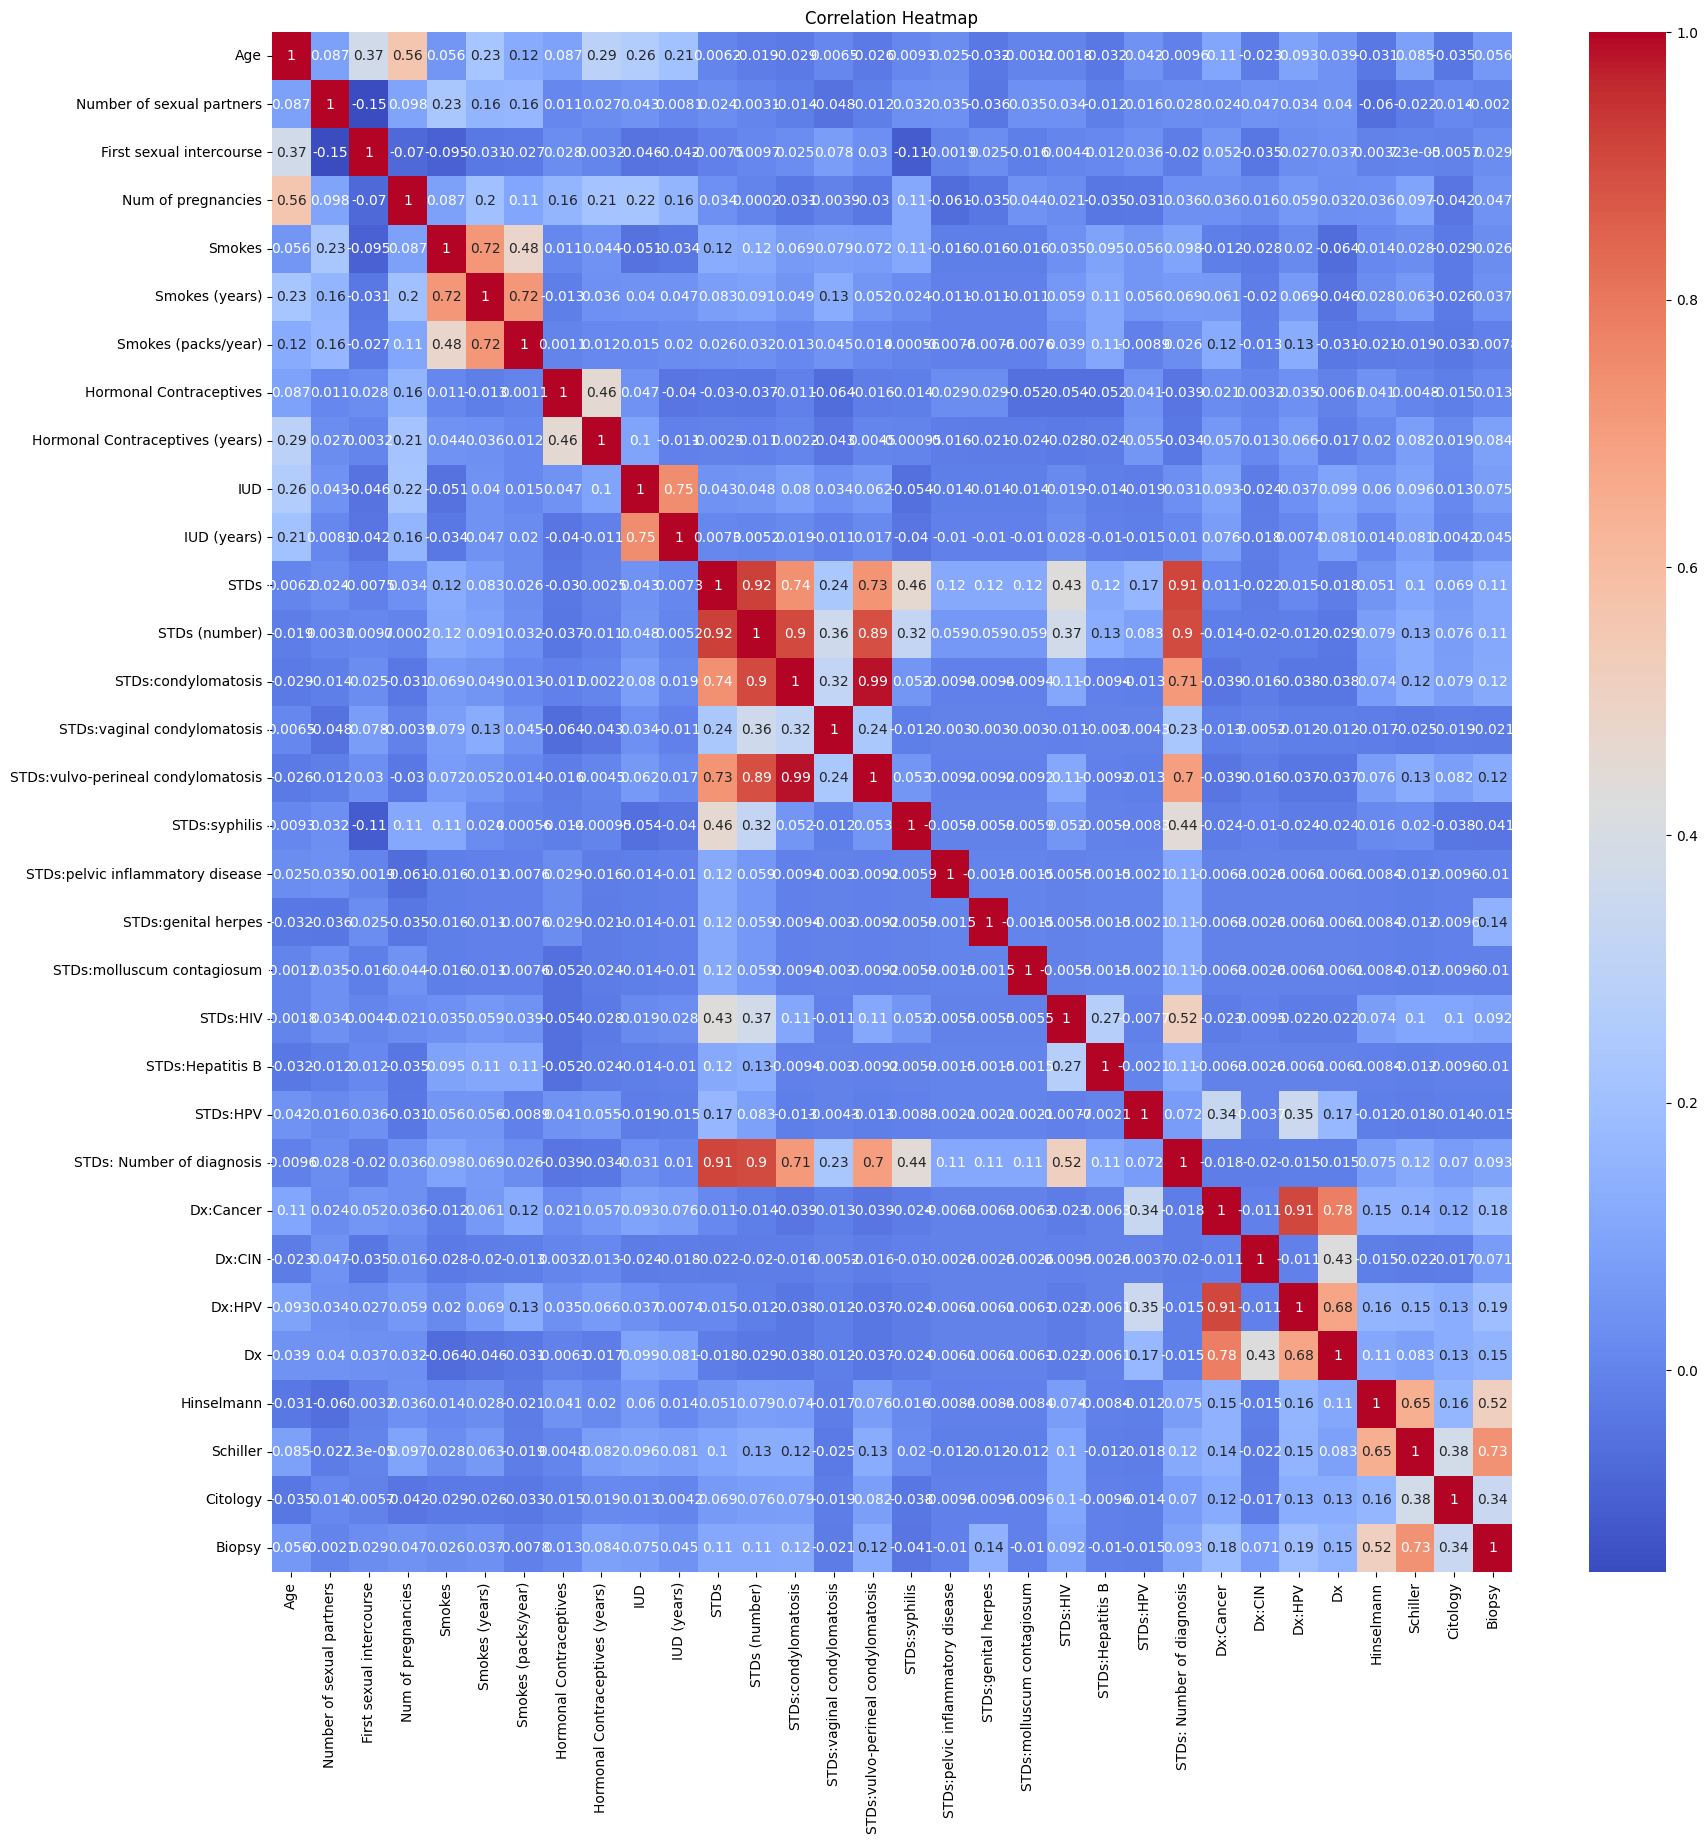

In [91]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 20))  # Set the figure size (optional)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# K-means

As the data is now correctely parametrized we shall begin our analysis if k-means method.

In [92]:
# df will be the raw data set after removing nulls and droping uniteresting columns
kmeans_df = df
kmeans_df.shape

(668, 32)

In [93]:
# scalling the variables
scaler = MinMaxScaler()
scale = scaler.fit_transform(kmeans_df[kmeans_df.columns])
df_scale = pd.DataFrame(scale, columns = kmeans_df.columns)
df_scale.head(5)
kmeans_df = df_scale

In [94]:
len(kmeans_df.query("Biopsy==1"))

45

In [95]:
kmeans_df = kmeans_df.drop(columns=['Biopsy'])

EM = []
CH = []
CH.append(0)
DB = []
DB.append(0)
SI = []
SI.append(0)
tam=10
for cluster in range(1,tam):
    kmeans = KMeans(n_clusters = cluster, init='k-means++').fit(df_scale)
    EM.append(kmeans.inertia_)

    labels = kmeans.labels_
    labels = kmeans.labels_
    if cluster >1:
      CH.append(metrics.calinski_harabasz_score(df_scale, labels))
      DB.append(metrics.davies_bouldin_score(df_scale, labels))
      SI.append(metrics.silhouette_score(df_scale, labels))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

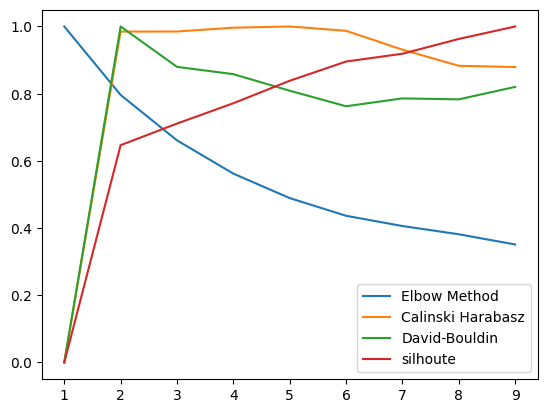

In [96]:
# converting the results into a dataframe and plotting them

EM = np.array(EM)
SI = np.array(SI)
CH = np.array(CH)
DB = np.array(DB)

EM = EM / EM.max()
CH = CH / CH.max()
SI = SI / SI.max()
DB = DB / DB.max()


X = range(1,tam)
plt.plot(X, EM, label = 'Elbow Method')
plt.plot(X, CH, label = 'Calinski Harabasz')
plt.plot(X, DB, label = 'David-Bouldin')
plt.plot(X, SI, label = 'silhoute')
plt.legend()
plt.show()

the number of cluster chosen is 6 by the cluster analysis above.

In [97]:
num_clusters = 3

km=KMeans(n_clusters= num_clusters)
y_predicted = km.fit_predict(df_scale[kmeans_df.columns])
y_predicted.size
kmeans_df["Cluster"] = y_predicted

kmeans_model = KMeans(n_clusters=num_clusters, random_state=1).fit(df_scale)
labels = kmeans_model.labels_
metrics.calinski_harabasz_score(df_scale, labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


173.88335929400625

In [98]:
kmeans_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Cluster
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,...,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.200915,0.056443,0.324646,0.211214,0.143713,0.033393,0.012404,0.643713,0.104093,0.112275,...,0.002994,0.030938,0.025449,0.004491,0.023952,0.023952,0.044910,0.094311,0.058383,0.446108
std,0.122922,0.060752,0.129638,0.133211,0.351061,0.113341,0.063143,0.479260,0.169291,0.315942,...,0.054677,0.103452,0.157603,0.066915,0.153015,0.153015,0.207262,0.292480,0.234642,0.598674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.112676,0.037037,0.227273,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.183099,0.037037,0.318182,0.181818,0.000000,0.000000,0.000000,1.000000,0.022727,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.281690,0.074074,0.363636,0.272727,0.000000,0.000000,0.000000,1.000000,0.136364,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


(array([407.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 224.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  37.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        , 1.06666667, 1.13333333, 1.2       , 1.26666667,
        1.33333333, 1.4       , 1.46666667, 1.53333333, 1.6       ,
        1.66666667, 1.73333333, 1.8       , 1.86666667, 1.93333333,
        2.        ]),
 <BarContainer object of 30 artists>)

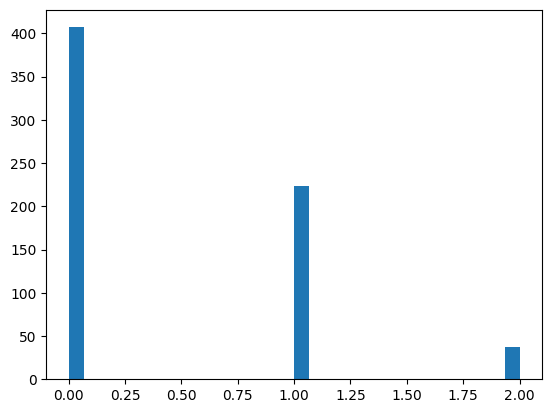

In [99]:
plt.hist(kmeans_df['Cluster'], bins=30, label="cluster")

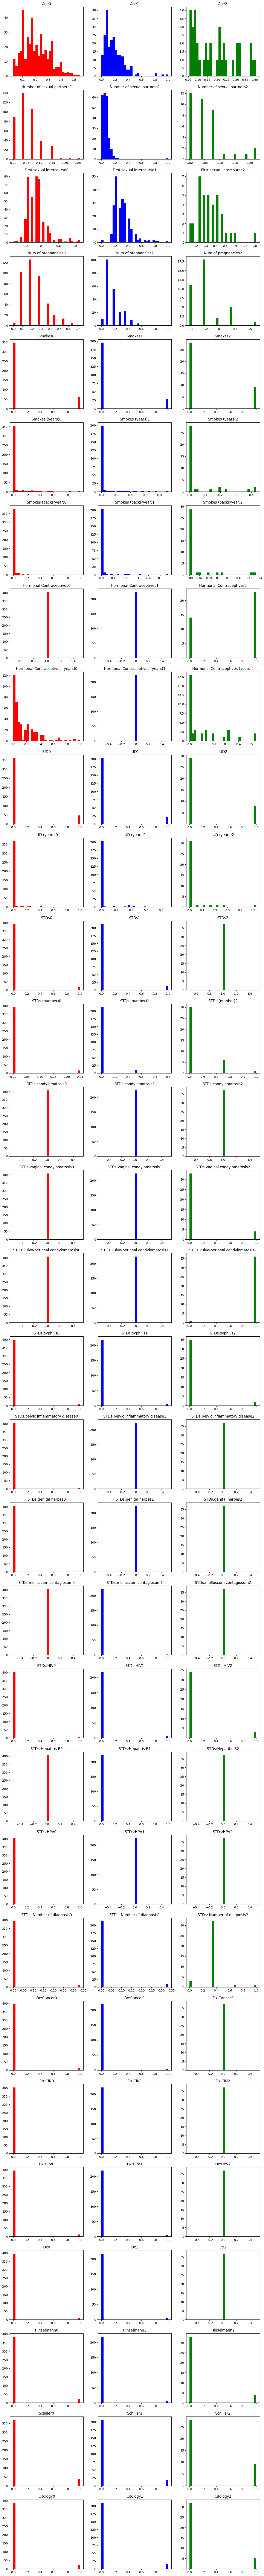

In [100]:


fig, ax = plt.subplots( len(kmeans_df.columns) - 1,3, figsize=(15,5*31))
for i in range(0,len(kmeans_df.columns) - 1):
  ax[i][0].hist( kmeans_df.query("Cluster==0")[ kmeans_df.columns[i] ],bins=30, label='cluster 0',color='red')
  ax[i][0].set(title=kmeans_df.columns[i]+ "0")

  ax[i][1].hist(kmeans_df.query("Cluster==1")[kmeans_df.columns[i]],bins=30, label='cluster 1', color='b')
  ax[i][1].set(title=kmeans_df.columns[i]+"1")

  ax[i][2].hist(kmeans_df.query("Cluster==2")[kmeans_df.columns[i]],bins=30, label='cluster 2', color ='g')
  ax[i][2].set(title=kmeans_df.columns[i]+"2")


plt.show()


(array([316.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 166.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  23.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        , 1.06666667, 1.13333333, 1.2       , 1.26666667,
        1.33333333, 1.4       , 1.46666667, 1.53333333, 1.6       ,
        1.66666667, 1.73333333, 1.8       , 1.86666667, 1.93333333,
        2.        ]),
 <BarContainer object of 30 artists>)

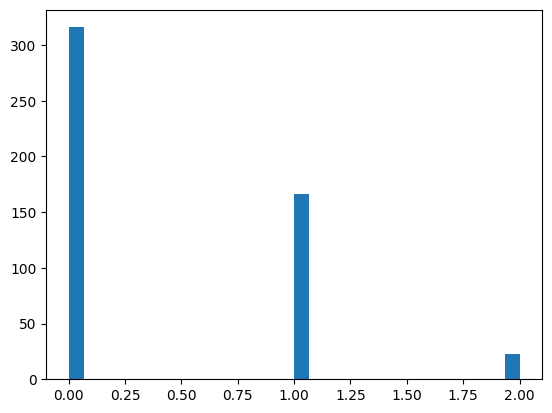

In [101]:
kmeans_df['Biopsy'] = df['Biopsy']


plt.hist(kmeans_df.query("Biopsy==0")['Cluster'], bins=30, label="cluster")

(array([22.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., 12.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

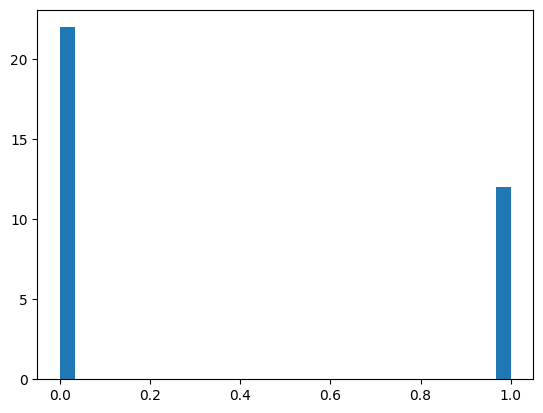

In [102]:

plt.hist(kmeans_df.query("Biopsy==1")['Cluster'], bins=30, label="cluster")

In [103]:
len(kmeans_df.query("Biopsy==1"))

34